___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
import category_encoders as ce
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from yellowbrick.classifier import PrecisionRecallCurve

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df =  pd.read_csv("HR_Dataset.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [5]:
df.duplicated().sum()

3008

In [6]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [10]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

Departments                   : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary                        : ['low' 'medium' 'high']


In [11]:
for i in df.select_dtypes("number"):
    print(f"{i:<30}:", df[i].unique())

satisfaction_level            : [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation               : [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project                : [2 5 7 6 4 3]
average_montly_hours          : [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [12]:
df.rename(columns={"Work_accident": "work_accident","Departments ": "departments"}, inplace = True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [13]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [14]:
df[df["left"] == 0].mean() 

satisfaction_level         0.667365
last_evaluation            0.715667
number_project             3.786800
average_montly_hours     198.942700
time_spend_company         3.262000
work_accident              0.174500
left                       0.000000
promotion_last_5years      0.019500
dtype: float64

In [15]:
df[df["left"] == 1].mean()

satisfaction_level         0.440271
last_evaluation            0.721783
number_project             3.883476
average_montly_hours     208.162230
time_spend_company         3.881467
work_accident              0.052737
left                       1.000000
promotion_last_5years      0.004018
dtype: float64

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'departments', 'salary'], dtype='object')

In [17]:
pd.crosstab(df["left"], df["departments"])

departments,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,818,609,512,488,384,561,576,2689,1509,1854
1,158,85,109,113,52,112,110,550,312,390


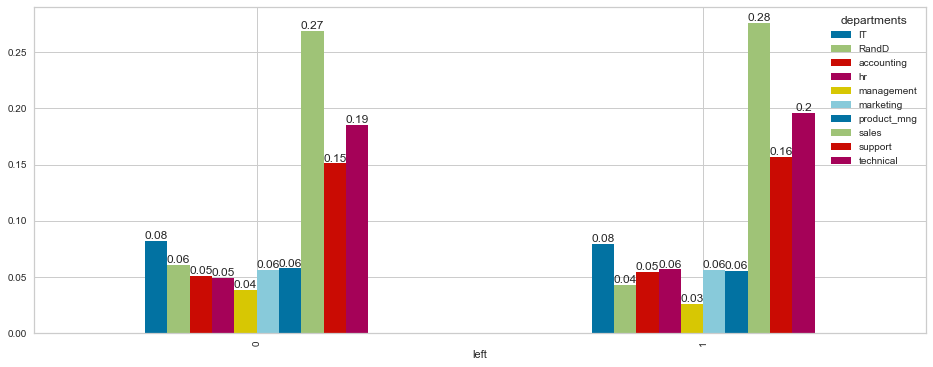

In [18]:
ax = pd.crosstab(df["left"], df["departments"], normalize = 'index').plot.bar(figsize=(16, 6))
for c in ax.containers:
    labels = [round(a,2) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge")

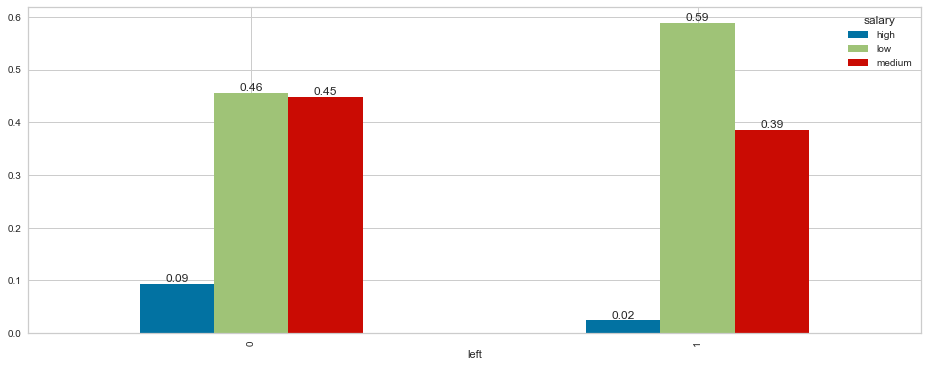

In [19]:
ax = pd.crosstab(df["left"], df["salary"], normalize = 'index').plot.bar(figsize=(16, 6))
for c in ax.containers:
    labels = [round(a,2) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge")


In [20]:
df.groupby("left")[df.columns].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.0,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,1.0,0.004018


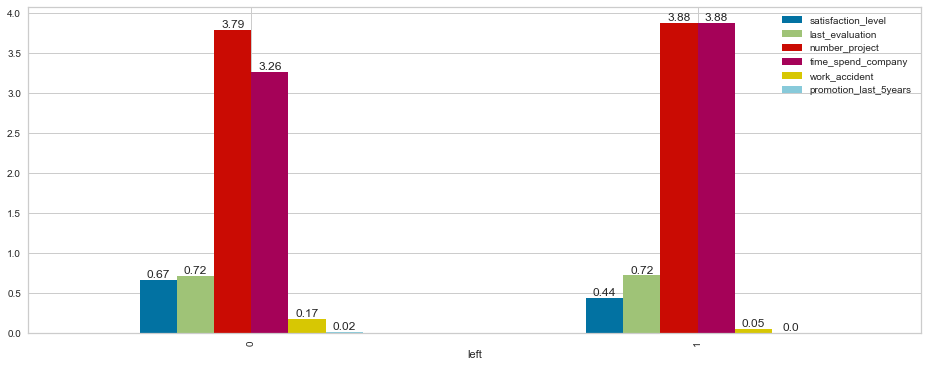

In [21]:
ax = df.groupby("left")[df.columns[(df.columns != "average_montly_hours") & (df.columns != "left")]].mean().plot.bar(figsize=(16, 6))
for c in ax.containers:
    labels = [round(a,2) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge")




## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

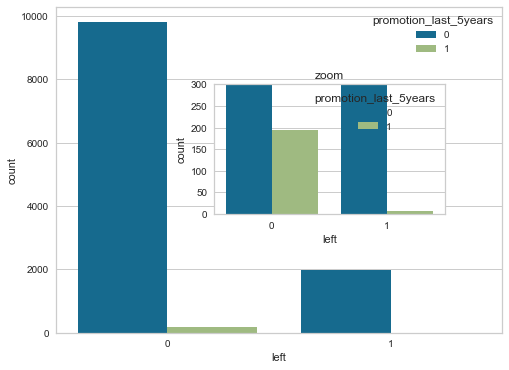

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data =df,  x = "left" , hue = "promotion_last_5years")
ax2 = plt.axes([0.4, 0.4, .4, .3], facecolor='w')
sns.countplot(data =df,  x = "left" , hue = "promotion_last_5years");
ax2.set_title('zoom')
ax2.set_ylim([0,300]);

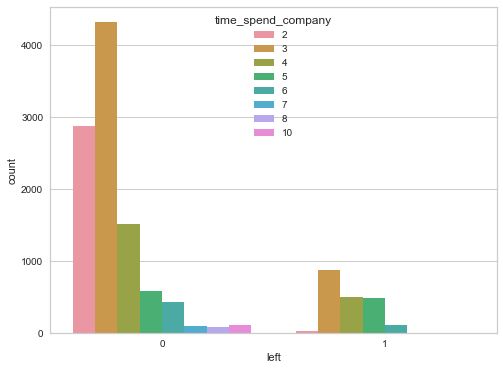

In [23]:
plt.figure(figsize = (8,6))
ax =sns.countplot(data =df,  x = "left" , hue = "time_spend_company")

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

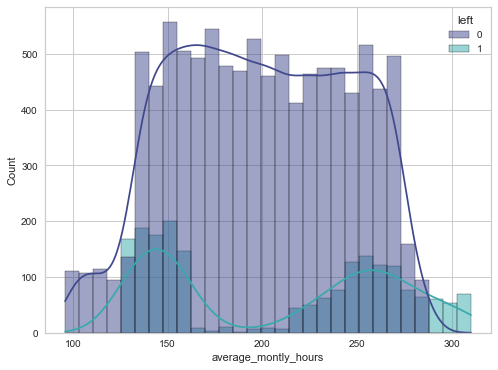

In [24]:
plt.figure(figsize = (8,6))
sns.histplot(data =df, x = "average_montly_hours", hue ="left" , palette="mako" ,kde= True)

<Figure size 576x432 with 0 Axes>

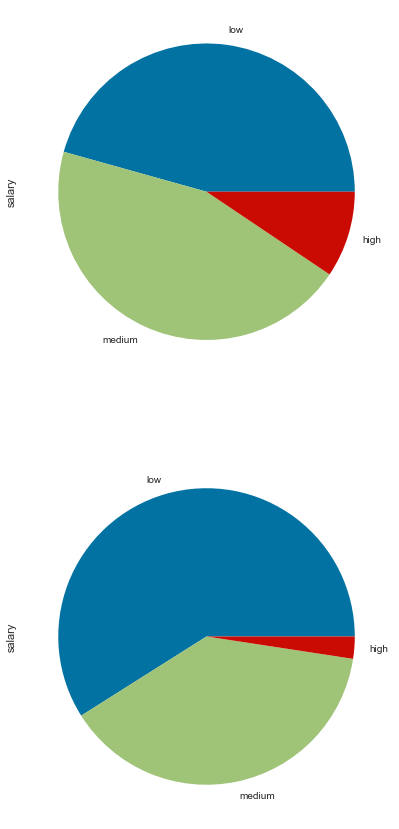

In [25]:
plt.figure(figsize = (8,6))
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15))
for i in df.left.value_counts().index:
    df[df['left']==i]["salary"].value_counts(normalize=True).plot(kind='pie', ax = axes[i])
    

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

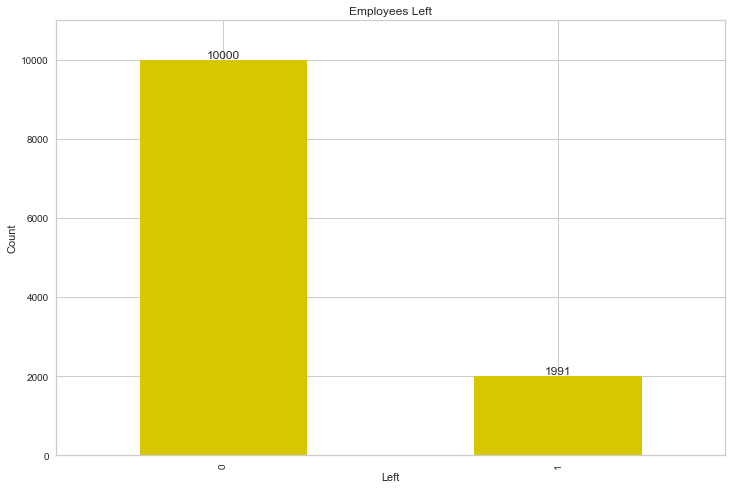

In [26]:
ax = df["left"].value_counts().plot(kind='bar', figsize=(12, 8), title='Employees Left',
             xlabel='Left', ylabel='Count', legend=False, color = "y")
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

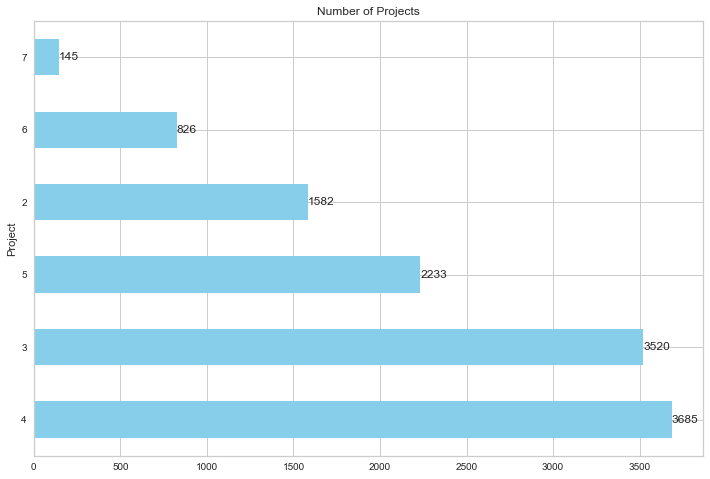

In [27]:
ax = df["number_project"].value_counts().plot(kind='barh', figsize=(12, 8), title='Number of Projects',
             xlabel='Project', ylabel='Count', legend=False, color = "skyblue")
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


<Figure size 576x432 with 0 Axes>

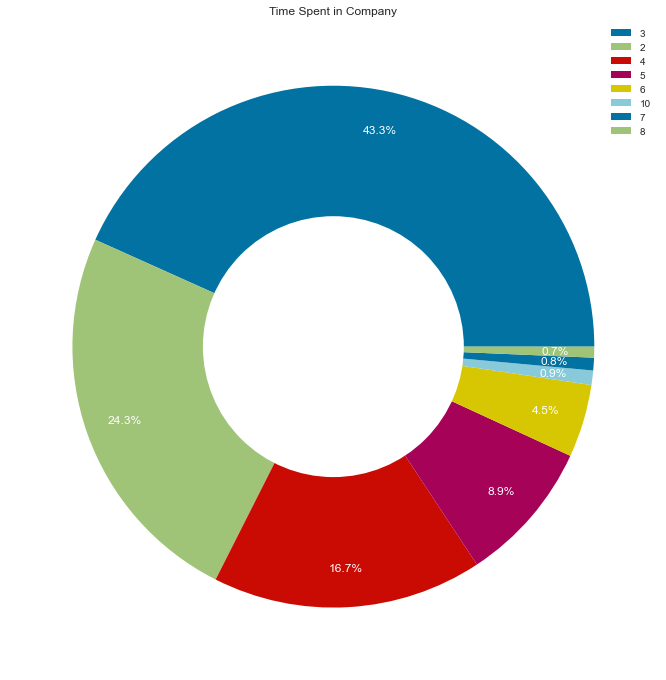

In [28]:
plt.figure(figsize = (8,6))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
Index = df["time_spend_company"].value_counts().index
Values = df["time_spend_company"].value_counts().values
plt.pie( Values,  labels=Index,
        autopct='%1.1f%%', pctdistance=0.85, textprops={'color':"w", 'weight':'light', 'fontsize':12})
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Time Spent in Company')
plt.legend(loc="best")
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

In [29]:
def column_histogram(col):
    fig = px.histogram(df,
                       x=col)
    fig.show()
cols = df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'number_pr…

In [30]:
def column_boxer1(col):
    fig = px.box(df, x = df["left"],
                 y= col, color = "left")
    fig.show() 
cols = df.columns[~df.columns.isin(['left', 'departments', 'work_accident', 'promotion_last_5years', 'salary'])]    
interact(column_boxer1,col = cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'number_pr…

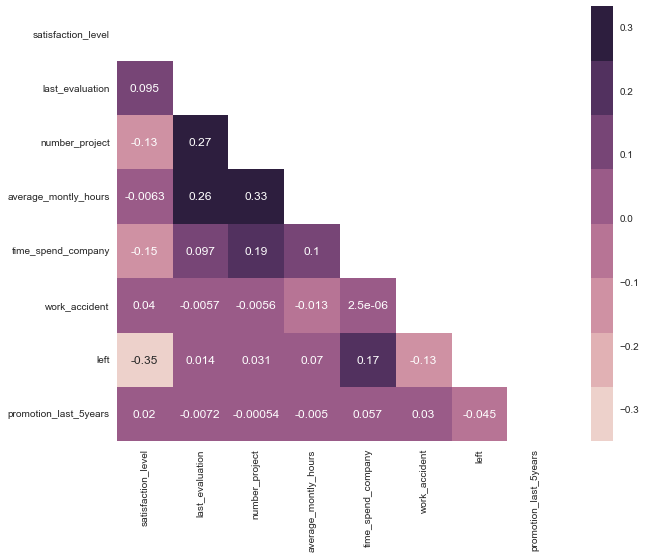

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix);

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [32]:
df1 = df.copy()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df.skew()

satisfaction_level      -0.538702
last_evaluation         -0.031686
number_project           0.332152
average_montly_hours     0.027208
time_spend_company       1.816577
work_accident            1.914410
left                     1.795135
promotion_last_5years    7.490008
dtype: float64

In [34]:
df_trans = df1[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_trans)
df_scaled = pd.DataFrame(df_scaled, columns =df_trans.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291
1,0.706637,0.851380,1.029194,1.262709,1.981036
2,-2.155721,0.970190,2.748604,1.467939,0.477485
3,0.374770,0.910785,1.029194,0.462311,1.229261
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291


In [35]:
df_scaled.skew()

satisfaction_level     -0.538702
last_evaluation        -0.031686
number_project          0.332152
average_montly_hours    0.027208
time_spend_company      1.816577
dtype: float64

In [36]:
df_scaled.drop(['time_spend_company'], axis=1, inplace= True)
df_scaled

,satisfaction_level,last_evaluation,number_project,average_montly_hours
0,-1.035668,-1.108990,-1.549921,-0.892208
1,0.706637,0.851380,1.029194,1.262709
2,-2.155721,0.970190,2.748604,1.467939
3,0.374770,0.910785,1.029194,0.462311
4,-1.077151,-1.168396,-1.549921,-0.851162
...,...,...,...,...
11986,1.121472,-0.990180,-0.690216,1.201140
11987,0.457736,1.386026,1.029194,1.344801
11988,0.914054,-1.049585,-0.690216,-0.317563
11989,-1.243085,-0.396129,-0.690216,-0.584363


In [37]:
df_pt = df1[["time_spend_company"]]
pt = PowerTransformer(method='yeo-johnson')
df_trans_pt = pt.fit_transform(df_pt)
df_trans_pt = pd.DataFrame(df_trans_pt, columns =df_pt.columns)
df_trans_pt.head()

,time_spend_company
0,-0.057329
1,1.693702
2,0.763117
3,1.307012
4,-0.057329


In [38]:
df_trans_pt.skew()

time_spend_company    0.053488
dtype: float64

In [39]:
df_scaled = pd.concat([df_scaled, df_trans_pt], axis="columns")
df_scaled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.057329
1,0.706637,0.851380,1.029194,1.262709,1.693702
2,-2.155721,0.970190,2.748604,1.467939,0.763117
3,0.374770,0.910785,1.029194,0.462311,1.307012
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.057329
...,...,...,...,...,...
11986,1.121472,-0.990180,-0.690216,1.201140,2.530720
11987,0.457736,1.386026,1.029194,1.344801,2.530720
11988,0.914054,-1.049585,-0.690216,-0.317563,2.530720
11989,-1.243085,-0.396129,-0.690216,-0.584363,2.530720


In [40]:
df_scaled.skew()

satisfaction_level     -0.538702
last_evaluation        -0.031686
number_project          0.332152
average_montly_hours    0.027208
time_spend_company      0.053488
dtype: float64

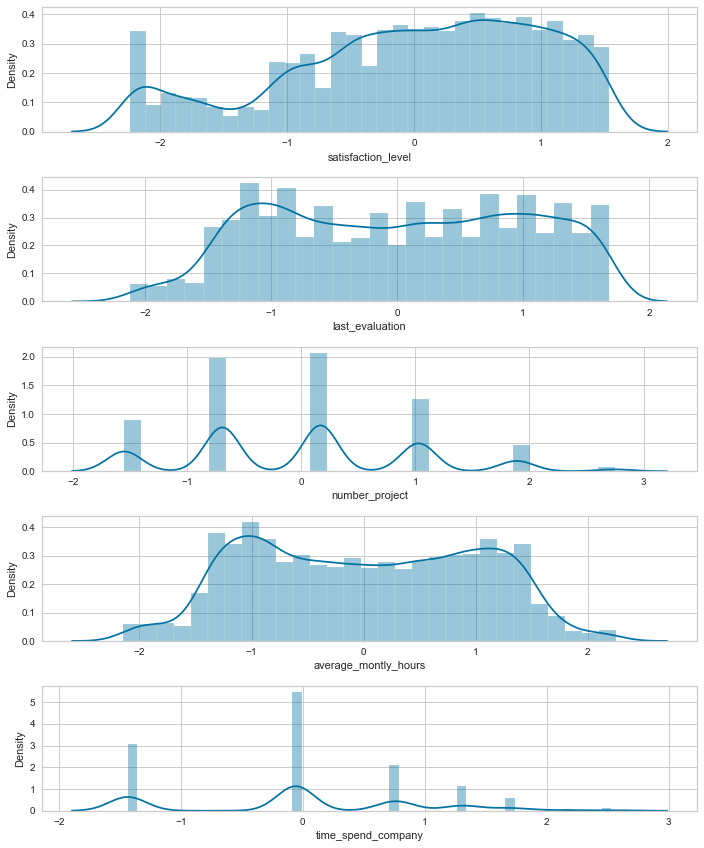

In [41]:
f, ax = plt.subplots(figsize=(10, 12))
plt.subplot(5, 1, 1); sns.distplot(df_scaled.satisfaction_level, label = 'satisfaction_level')
plt.subplot(5, 1, 2); sns.distplot(df_scaled.last_evaluation, label = 'last_evaluation')
plt.subplot(5, 1, 3); sns.distplot(df_scaled.number_project, label = 'number_project')
plt.subplot(5, 1, 4); sns.distplot(df_scaled.average_montly_hours, label = 'average_montly_hours')
plt.subplot(5, 1, 5); sns.distplot(df_scaled.time_spend_company, label = 'time_spend_company')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [42]:
encoder= ce.OrdinalEncoder(cols=['salary'], return_df=True, 
                           mapping=[{'col':'salary', 'mapping':{'low':0, 'medium':1, 'high':2}}])

In [43]:
df["salary"] = encoder.fit_transform(df["salary"])
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
1534,0.10,0.94,6,297,5,0,1,0,marketing,0
7545,0.77,0.80,3,147,3,0,0,0,IT,0
4022,0.68,0.65,3,183,4,0,0,0,support,0
2068,0.62,0.74,4,213,4,0,0,0,marketing,0
8673,0.89,0.75,4,246,3,1,0,0,support,0


In [44]:
df["departments"].value_counts().index

Index(['sales', 'technical', 'support', 'IT', 'RandD', 'product_mng', 'marketing', 'accounting', 'hr', 'management'], dtype='object')

In [45]:
cat_for_departments = ['sales', 'technical', 'support', 'IT', 'RandD', 'product_mng', 'marketing', 'accounting', 'hr', 'management']
enc2 = OrdinalEncoder(categories= [cat_for_departments])



In [46]:
enc2.fit_transform(df[["departments"]])


array([[0.],
       [0.],
       [0.],
       ...,
       [9.],
       [6.],
       [3.]])

In [47]:
enc2.get_feature_names_out()

array(['departments'], dtype=object)

In [48]:
df["departments"] = pd.DataFrame(enc2.fit_transform(df[["departments"]]), index =df.index.values, 
                           columns = enc2.get_feature_names_out())

In [49]:
df.salary = df.salary.astype(float)

In [50]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
1393,0.82,0.93,4,246,5,0,1,0,0.0,1.0
9520,0.54,0.92,4,175,3,0,0,0,2.0,0.0
6777,0.59,0.89,3,192,2,0,0,0,3.0,0.0
9641,0.61,0.83,5,269,5,1,0,0,0.0,0.0
7383,0.77,0.98,3,273,3,0,0,0,2.0,2.0


## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [51]:
df_scaled.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
5291,1.287406,-0.158508,-1.549921,-0.050764,-0.057329
181,-2.197205,0.732570,1.888899,1.242186,0.763117
10739,-2.031271,0.079113,1.888899,0.749634,1.307012
1503,1.038505,0.970190,1.029194,0.975387,1.307012
11576,1.162955,0.197923,-1.549921,-1.097438,-0.057329


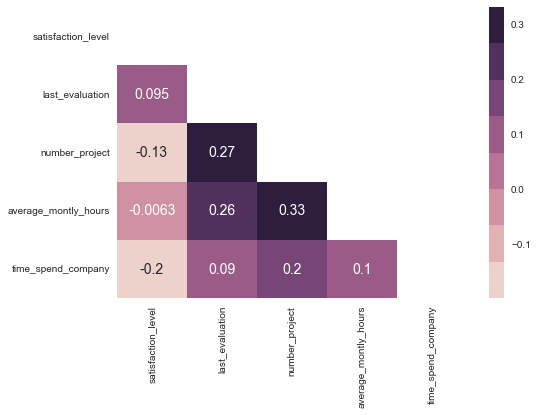

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
matrix = np.triu(df_scaled.corr())
sns.heatmap(df_scaled.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix);

In [53]:
from sklearn.neighbors import BallTree

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [54]:
hopkins(df_scaled, df_scaled.shape[0])

0.2574107135004703

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

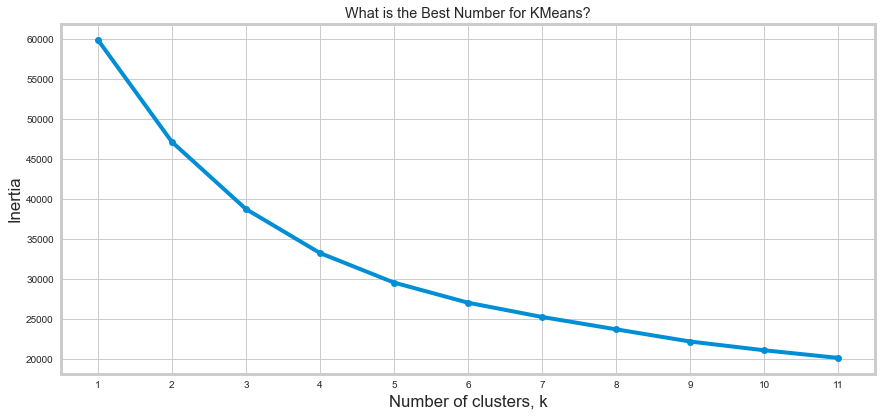

In [55]:
ks = range(1, 12)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(df_scaled)
    inertias.append(kc.inertia_)
f, ax = plt.subplots(figsize=(13, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

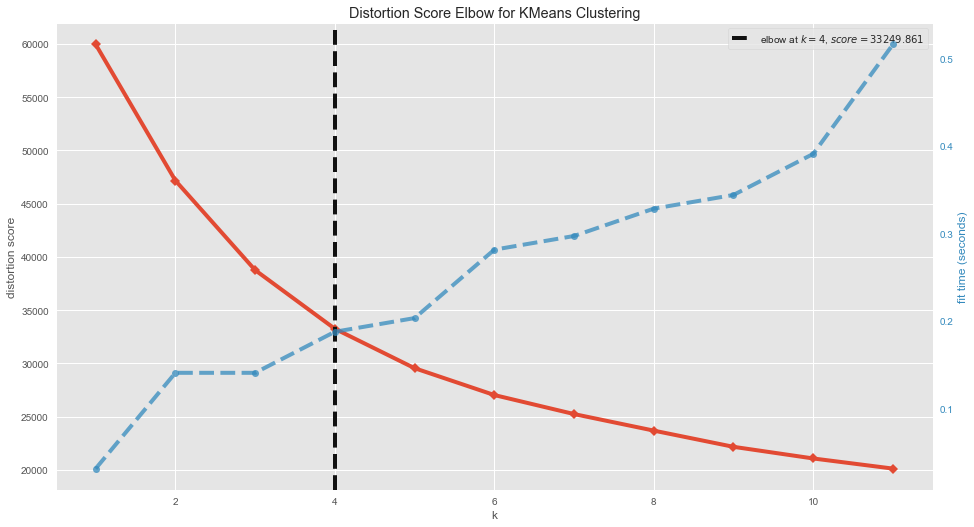

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
plt.figure(figsize=(14, 8))
visualizer.fit(df_scaled)        
visualizer.show()

In [57]:
ssd =[]

K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.21340602783388815
Silhouette Score for 3 clusters: 0.20994132435770682
Silhouette Score for 4 clusters: 0.22957423208421635
Silhouette Score for 5 clusters: 0.23066956153378568
Silhouette Score for 6 clusters: 0.22974844383277515
Silhouette Score for 7 clusters: 0.22897620790245743
Silhouette Score for 8 clusters: 0.23445591342404998
Silhouette Score for 9 clusters: 0.2343087650813251
Silhouette Score for 10 clusters: 0.23675563473746825
Silhouette Score for 11 clusters: 0.23534813906566868


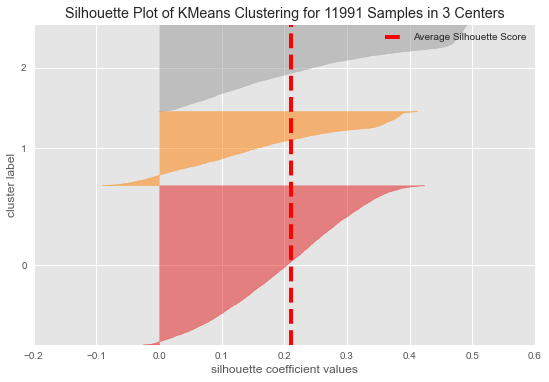

In [58]:
model_3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model_3)
visualizer.fit(df_scaled)  
visualizer.poof();

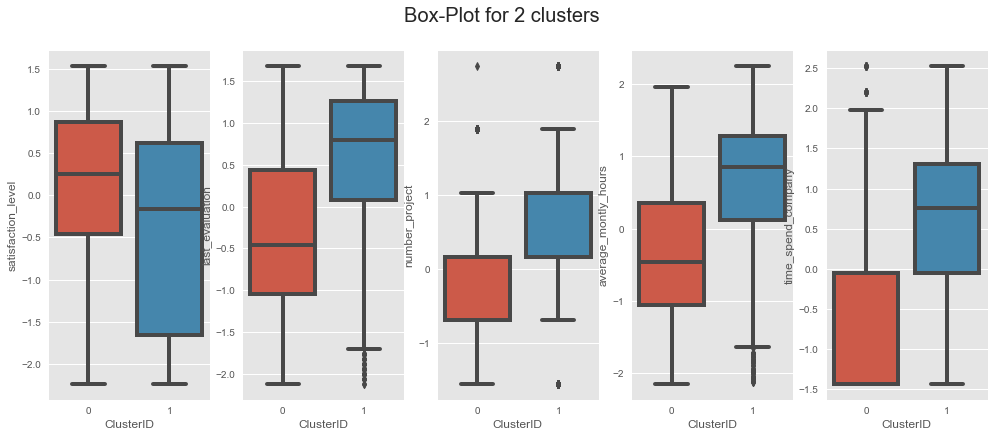

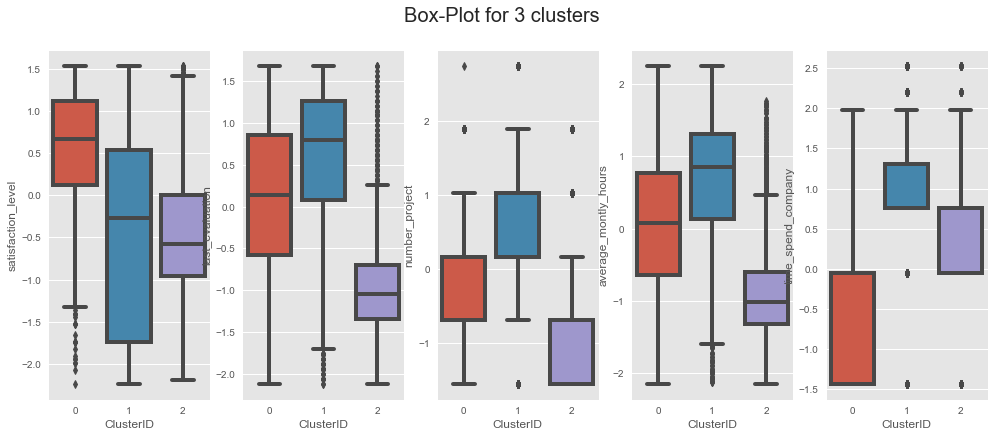

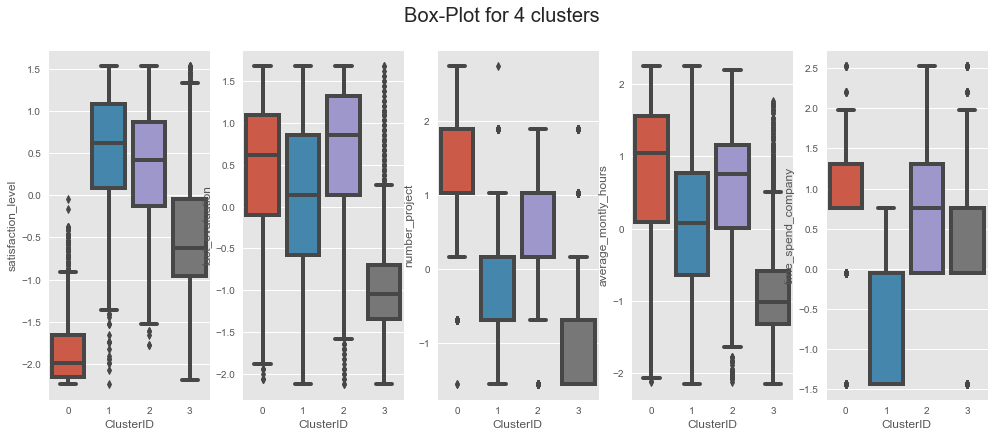

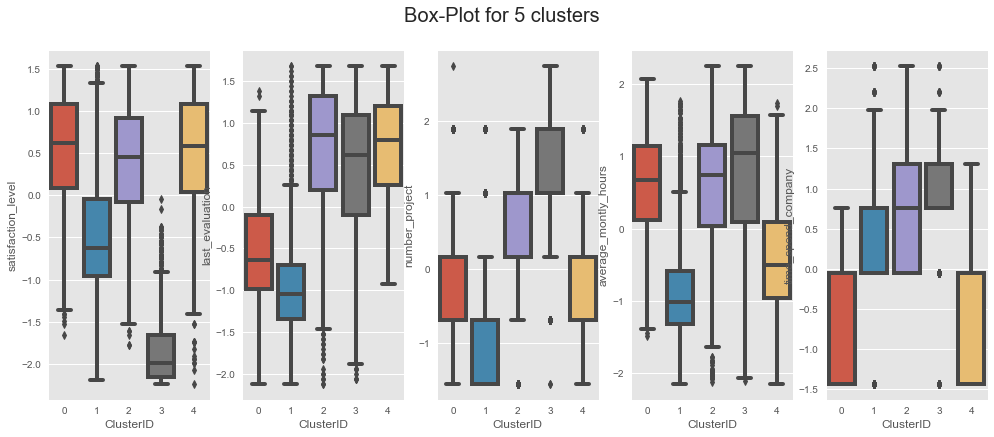

In [59]:
for k in range(2, 6):
    model = KMeans(n_clusters = k).fit(df_scaled)
    model.fit_predict(df_scaled)
    labels = model.labels_
    df_scaled['ClusterID']=labels

    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(1, 5, 1)
    sns.boxplot(df_scaled['ClusterID'], df_scaled['satisfaction_level'])

    plt.subplot(1, 5, 2)
    sns.boxplot(df_scaled['ClusterID'], df_scaled['last_evaluation'])

    plt.subplot(1, 5, 3)
    sns.boxplot(df_scaled['ClusterID'], df_scaled['number_project'])
    
    plt.subplot(1, 5, 4)
    sns.boxplot(df_scaled['ClusterID'], df_scaled['average_montly_hours'])
    
    plt.subplot(1, 5, 5)
    sns.boxplot(df_scaled['ClusterID'], df_scaled['time_spend_company'])
    
    fig.suptitle(f"Box-Plot for {k} clusters", fontsize=20)
    
    plt.show();

In [60]:
kmeans = KMeans(n_clusters = 3).fit(df_scaled)
kmeans.fit_predict(df_scaled)
labels = kmeans.labels_
df_scaled['ClusterID']=labels
df_scaled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,ClusterID
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.057329,1
1,0.706637,0.851380,1.029194,1.262709,1.693702,0
2,-2.155721,0.970190,2.748604,1.467939,0.763117,0
3,0.374770,0.910785,1.029194,0.462311,1.307012,0
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.057329,1
...,...,...,...,...,...,...
11986,1.121472,-0.990180,-0.690216,1.201140,2.530720,0
11987,0.457736,1.386026,1.029194,1.344801,2.530720,0
11988,0.914054,-1.049585,-0.690216,-0.317563,2.530720,1
11989,-1.243085,-0.396129,-0.690216,-0.584363,2.530720,0


In [61]:
df_scaled.ClusterID.value_counts()

1    5533
0    3745
2    2713
Name: ClusterID, dtype: int64

In [62]:
adjusted_rand_score(df.left, df_scaled.ClusterID)


0.006610886518579543

## 5. Model Building

### Split Data as Train and Test Set

In [63]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,9.0,2.0
11996,0.74,0.95,5,266,10,0,0,1,9.0,2.0
11997,0.85,0.54,3,185,10,0,0,1,9.0,2.0
11998,0.33,0.65,3,172,10,0,0,1,6.0,2.0


In [64]:
X = df.drop('left', axis=1)
y = df["left"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### #Distance Based(?) Algorithm

#### Model Building

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [67]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [68]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
y_pred_proba = pipe_model.predict_proba(X_test)


In [70]:
pd.DataFrame(y_pred_proba)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)


,Actual,Pred,Proba_1,Proba_0
3802,0,0,0.0,1.0
6585,0,0,0.0,1.0
10755,0,0,0.0,1.0
5760,0,0,0.0,1.0
5976,0,0,0.0,1.0
7203,0,0,0.0,1.0
2317,0,0,0.0,1.0
10808,0,0,0.0,1.0
7881,0,0,0.0,1.0
9641,0,0,0.4,0.6


#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [72]:
confusion_matrix(y_test, y_pred)

array([[1956,   45],
       [  32,  366]], dtype=int64)

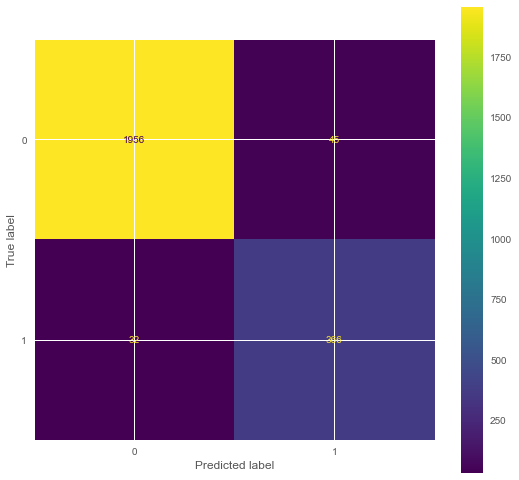

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipe_model, X_test, y_test, ax=ax);

In [74]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [75]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1956   45]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.89      0.92      0.90       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7851  148]
 [ 145 1448]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.91      0.91      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.95      0.94      9592
weighted avg       0.97      0.97      0.97      9592



#### Grid Search CV

In [76]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [77]:
#k_values= range(1,30)
#param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

In [78]:
#knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True)

In [79]:
#knn_grid_model.fit(X_train, y_train)

In [80]:
#knn_grid_model.best_params_ #{'knn__n_neighbors': 4, 'knn__p': 1, 'knn__weights': 'uniform'}


In [81]:
#knn_grid_model.best_index_ # knn_grid_model.best_index_  12

In [82]:
#pd.DataFrame(knn_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

In [83]:
#knn_grid_model.best_score_

In [84]:
#eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

In [85]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

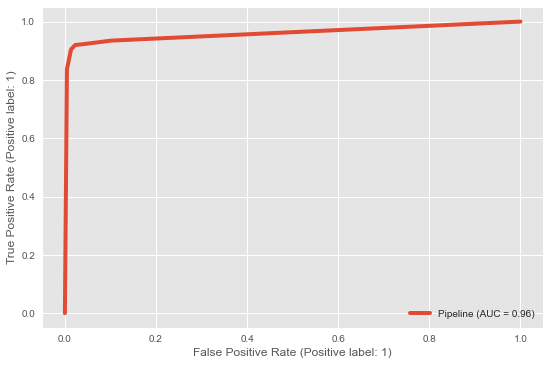

In [86]:
plot_roc_curve(pipe_model, X_test, y_test)

In [87]:
knn_pre_score = average_precision_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

#### Prediction

In [88]:
import pickle

In [89]:
pickle.dump(pipe_model, open('knn_model', 'wb'))
loaded_model = pickle.load(open('knn_model', 'rb'))

In [90]:
pipe_model.predict(df.drop('left', axis=1).iloc[[4000]])

array([0], dtype=int64)

### #Random Forest Classifier

#### Model Building

In [91]:
X = df1.drop(columns="left")
y = df1['left']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [93]:
cat = X_train.select_dtypes("object").columns
from sklearn.compose import make_column_transformer
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder= MinMaxScaler())

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestClassifier( class_weight="balanced", random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

#### Evaluating Model Performance and Tuning

In [96]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)


Test_Set
[[1000    1]
 [  15  184]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.99      0.92      0.96       199

    accuracy                           0.99      1200
   macro avg       0.99      0.96      0.98      1200
weighted avg       0.99      0.99      0.99      1200


Train_Set
[[8999    0]
 [   0 1792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8999
           1       1.00      1.00      1.00      1792

    accuracy                           1.00     10791
   macro avg       1.00      1.00      1.00     10791
weighted avg       1.00      1.00      1.00     10791



In [97]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.983504
train_accuracy     1.000000
test_precision     0.989322
train_precision    1.000000
test_recall        0.910695
train_recall       1.000000
test_f1            0.948180
train_f1           1.000000
dtype: float64

In [98]:

operations =[("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations)
param_grid = {"RF_model__n_estimators":[5, 10, 25, 50, 100, 200],
              "RF_model__max_depth": [1, 2, 5, 10],
              'RF_model__max_features':[2, 4, 'sqrt'],
              "RF_model__max_samples":[0.5, 0.8, 1]}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True, verbose=3)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [1, 2, 5, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.5, 0.8, 1],
                         'RF_model__n_estimators': [5, 10, 25, 50, 100, 200]},
             return_train_score=True, verbose=3)

In [99]:
grid_model.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 4,
 'RF_model__max_samples': 0.8,
 'RF_model__n_estimators': 100}

In [100]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1000    1]
 [  13  186]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.99      0.93      0.96       199

    accuracy                           0.99      1200
   macro avg       0.99      0.97      0.98      1200
weighted avg       0.99      0.99      0.99      1200


Train_Set
[[8981   18]
 [ 109 1683]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8999
           1       0.99      0.94      0.96      1792

    accuracy                           0.99     10791
   macro avg       0.99      0.97      0.98     10791
weighted avg       0.99      0.99      0.99     10791



In [101]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", 
                       RandomForestClassifier(class_weight="balanced", 
                       max_depth=10, max_features=4,
                       max_samples=0.8, n_estimators=100,
                       random_state=101))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.982948
train_accuracy     0.989086
test_precision     0.984570
train_precision    0.990305
test_recall        0.911809
train_recall       0.943514
test_f1            0.946600
train_f1           0.966342
dtype: float64

In [102]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

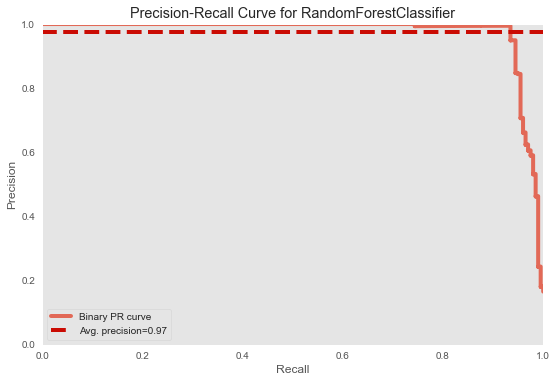

In [103]:
viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= [0,1],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [104]:
rf_pre_score = average_precision_score(y_test, y_pred) 
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

#### Prediction

In [105]:
model.predict(df1.drop('left', axis=1).iloc[[4000]])

array([0], dtype=int64)

### #XGBoost Classifier

#### Model Building

In [106]:
X = df.drop(columns="left")
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)
cat = X_train.select_dtypes("object").columns
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder= MinMaxScaler())

In [107]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(  random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

[14:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               ga...ance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

#### Evaluating Model Performance and Tuning

In [108]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[996   5]
 [ 15 184]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.97      0.92      0.95       199

    accuracy                           0.98      1200
   macro avg       0.98      0.96      0.97      1200
weighted avg       0.98      0.98      0.98      1200


Train_Set
[[8992    7]
 [  41 1751]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8999
           1       1.00      0.98      0.99      1792

    accuracy                           1.00     10791
   macro avg       1.00      0.99      0.99     10791
weighted avg       1.00      1.00      1.00     10791



In [109]:
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier(random_state=42)
cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall',
                                                            'f1'], cv = cv, return_train_score=True,
                                                             fit_params={"eval_metric":"logloss"})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.972137
train_precision    0.996656
test_recall        0.919063
train_recall       0.979663
test_f1            0.944600
train_f1           0.988085
dtype: float64

In [110]:
weights = class_weight.compute_sample_weight(class_weight = "balanced", y = y_train)
operations =[("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]
model = Pipeline(steps=operations)
param_grid = {"XGB_model__n_estimators":[50, 100, 200],
              'XGB_model__max_depth':[6, 7, 8],
              "XGB_model__learning_rate": [0.05, 0.1, 0.2],
              "XGB_model__subsample":[0.5, 0.8, 1], 
              "XGB_model__colsample_bytree":[0.7, 1, 1.5]}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True, verbose=3)
grid_model.fit(X_train,y_train, XGB_model__sample_weight = weights, XGB_model__eval_metric = "logloss")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index([], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytre...
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.7, 1, 1.5],
                         'XGB_model__learning_rate': [0.05, 0.1, 0.2],
                         'XGB_model__max_depth': [6, 7, 8],
                         'XGB_model__n_estimators': [50, 100, 200],
                         'XGB_model__subsample': [0.5, 0.8, 1]},
             return_train_score=True, verbose=3)

In [111]:
grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 8,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [112]:
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)


eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[996   5]
 [ 12 187]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.97      0.94      0.96       199

    accuracy                           0.99      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.99      0.99      0.99      1200


Train_Set
[[8977   22]
 [  13 1779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8999
           1       0.99      0.99      0.99      1792

    accuracy                           1.00     10791
   macro avg       0.99      1.00      0.99     10791
weighted avg       1.00      1.00      1.00     10791



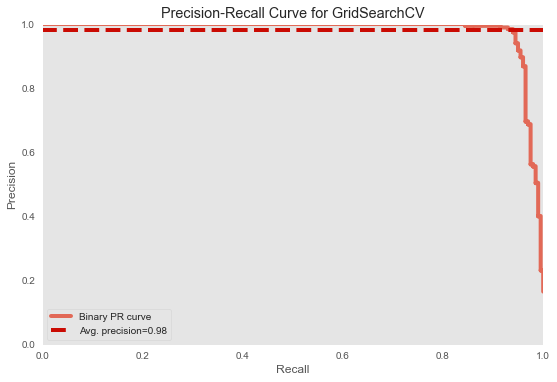

In [113]:
viz = PrecisionRecallCurve(
    grid_model,
    per_class=True, 
    classes= [0,1],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [114]:
from sklearn.model_selection import StratifiedKFold
operations = [("preprocessing", column_trans), ("xgb_model", XGBClassifier(n_estimators = 100, max_depth = 8, 
                      learning_rate = 0.1, subsample = 0.8, 
                      colsample_bytree =1,
                      n_jobs = -1, random_state=101))]
xgb_final_model = Pipeline(steps=operations)
cv = StratifiedKFold(n_splits=10)
scores = cross_validate(xgb_final_model, X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall'], 
                        cv = cv, return_train_score=True,
                        fit_params={"xgb_model__eval_metric":"logloss", "xgb_model__sample_weight": weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.981836
train_accuracy     0.996757
test_precision     0.967605
train_precision    0.986526
test_recall        0.921856
train_recall       0.994048
dtype: float64

In [115]:
operations = [("OrdinalEncoder", column_trans), ("pipe_final_model", XGBClassifier(n_estimators = 100, max_depth = 8, 
                      learning_rate = 0.1, subsample = 0.8, 
                      colsample_bytree =1,
                      n_jobs = -1, random_state=101))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X_train, y_train, pipe_final_model__sample_weight = weights, pipe_final_model__eval_metric = "logloss")

eval_metric(pipe_final_model, X_train, y_train, X_test, y_test)

Test_Set
[[996   5]
 [ 12 187]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.97      0.94      0.96       199

    accuracy                           0.99      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.99      0.99      0.99      1200


Train_Set
[[8977   22]
 [  13 1779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8999
           1       0.99      0.99      0.99      1792

    accuracy                           1.00     10791
   macro avg       0.99      1.00      0.99     10791
weighted avg       1.00      1.00      1.00     10791



In [116]:
xgb_pre_score = average_precision_score(y_test, y_pred) 
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)

#### Prediction

In [117]:
pipe_final_model.predict(df.drop('left', axis=1).iloc[[4000]])

array([0], dtype=int64)

### #ANN Classifier

#### Layer Architecture Building and Compiling

In [118]:
X = df1.drop('left', axis=1)
y = df1['left'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [120]:
from sklearn.preprocessing import OneHotEncoder
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False, 
                        handle_unknown="ignore")

In [121]:
from sklearn.compose import ColumnTransformer
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [122]:
X_train = col_transformer.fit_transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [123]:
scaler = MinMaxScaler() 

In [124]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKerasTF

In [126]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [127]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [128]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995924919733268, 1: 3.010229386236826}

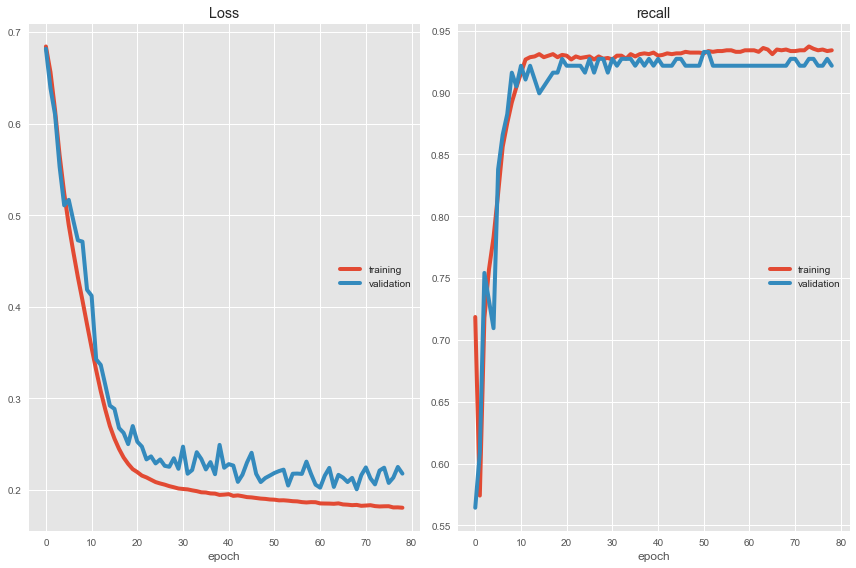

Loss
	training         	 (min:    0.181, max:    0.684, cur:    0.181)
	validation       	 (min:    0.201, max:    0.682, cur:    0.218)
recall
	training         	 (min:    0.574, max:    0.937, cur:    0.934)
	validation       	 (min:    0.564, max:    0.933, cur:    0.922)
76/76 [==============================] - 1s 9ms/step - loss: 0.1806 - recall: 0.9343 - val_loss: 0.2179 - val_recall: 0.9218
Epoch 79: early stopping


In [129]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

#### Evaluating Model Performance and Tunning

In [130]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

38/38 [==============================] - 0s 1ms/step
[[953  48]
 [ 13 186]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1001
           1       0.79      0.93      0.86       199

    accuracy                           0.95      1200
   macro avg       0.89      0.94      0.91      1200
weighted avg       0.95      0.95      0.95      1200



In [131]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


38/38 [==============================] - 0s 1ms/step


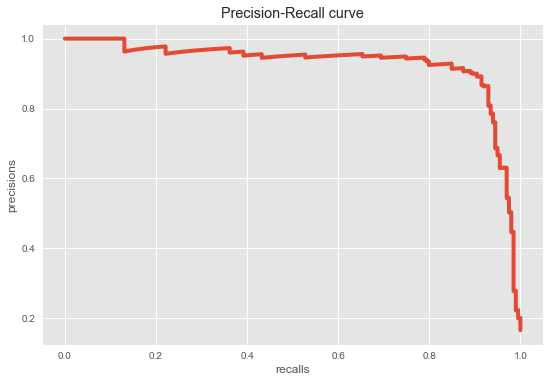

In [132]:
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

### Optuna

In [133]:
import optuna
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [134]:
trial_metric = "Recall"
batch_size = 300
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model

def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=200,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .86 : # after this threshold model gets terrible scores for class 0
        score = score * 0
    return score

In [135]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
study.best_params

[I 2023-02-28 14:29:21,959] A new study created in memory with name: no-name-c5166eeb-23db-4167-b0cb-b22f33b4be04


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:29:24,537] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 126, 'n_units2': 54, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00026395489164989514, 'w0': 1.9554303524693624, 'w1': 0.015088504347756253}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping


[I 2023-02-28 14:29:29,146] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 41, 'n_units2': 108, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 3.5131027083764084e-05, 'w0': 1.6656253586492453, 'w1': 0.07170396855405839}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 37.
Epoch 47: early stopping


[I 2023-02-28 14:29:36,630] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 71, 'n_units2': 125, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.07720177654664237, 'w0': 0.17700283803329903, 'w1': 0.1407187259657844}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:29:40,615] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 116, 'n_units2': 104, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.00032699089508087296, 'w0': 0.028093721339786337, 'w1': 0.8091767109314597}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:29:43,208] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 10, 'n_units2': 19, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0027085427025558472, 'w0': 0.03289475882368523, 'w1': 4.308054712523291}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:29:45,990] Trial 5 finished with value: 0.32663315534591675 and parameters: {'n_units1': 107, 'n_units2': 42, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.0052067480706420805, 'w0': 0.16868252908205936, 'w1': 4.280751755056976}. Best is trial 5 with value: 0.32663315534591675.


Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping


[I 2023-02-28 14:29:50,724] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 82, 'n_units2': 41, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0128218214351245, 'w0': 0.0142873443497531, 'w1': 0.21780880784150045}. Best is trial 5 with value: 0.32663315534591675.
[I 2023-02-28 14:30:17,075] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 41, 'n_units2': 73, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.002301562869738209, 'w0': 1.9952628794668372, 'w1': 1.7651318413277697}. Best is trial 5 with value: 0.32663315534591675.


Restoring model weights from the end of the best epoch: 92.
Epoch 102: early stopping


[I 2023-02-28 14:30:31,032] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 17, 'n_units2': 107, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0010097934685623232, 'w0': 0.5069554282688638, 'w1': 0.712064413673802}. Best is trial 5 with value: 0.32663315534591675.


Restoring model weights from the end of the best epoch: 20.
Epoch 30: early stopping


[I 2023-02-28 14:30:36,378] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 110, 'n_units2': 38, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.05608622436922196, 'w0': 0.0626452860723671, 'w1': 0.038915144397126136}. Best is trial 5 with value: 0.32663315534591675.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:30:39,060] Trial 10 finished with value: 0.20603014528751373 and parameters: {'n_units1': 92, 'n_units2': 12, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.0365766045796712e-05, 'w0': 0.19334997378429794, 'w1': 4.696851513199835}. Best is trial 5 with value: 0.32663315534591675.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:30:42,242] Trial 11 finished with value: 0.8090452551841736 and parameters: {'n_units1': 94, 'n_units2': 8, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.0468313576408667e-05, 'w0': 0.176915468057224, 'w1': 4.792423525823906}. Best is trial 11 with value: 0.8090452551841736.
[I 2023-02-28 14:31:08,975] Trial 12 finished with value: 0.07537688314914703 and parameters: {'n_units1': 99, 'n_units2': 26, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00010438211785139911, 'w0': 0.4660653460298014, 'w1': 1.4611188076461659}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:31:12,224] Trial 13 finished with value: 0.37688443064689636 and parameters: {'n_units1': 66, 'n_units2': 61, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.0033008561367305e-05, 'w0': 0.08753938476292612, 'w1': 4.993731924070432}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:31:15,109] Trial 14 finished with value: 0.6683416962623596 and parameters: {'n_units1': 50, 'n_units2': 74, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 1.1301808174586243e-05, 'w0': 0.07071477150408037, 'w1': 0.43437952492191845}. Best is trial 11 with value: 0.8090452551841736.
[I 2023-02-28 14:31:41,667] Trial 15 finished with value: 0.0 and parameters: {'n_units1': 53, 'n_units2': 87, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 4.93926955886794e-05, 'w0': 0.07397528624921379, 'w1': 0.39290199654461816}. Best is trial 11 with value: 0.8090452551841736.
[I 2023-02-28 14:32:07,333] Trial 16 finished with value: 0.18592964112758636 and parameters: {'n_units1': 32, 'n_units2': 79, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 3.050325738122214e-05, 'w0': 0.4701992557156038, 'w1': 0.30888015964100773}. Best is trial 11 with value: 0.8

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:32:10,238] Trial 17 finished with value: 0.0 and parameters: {'n_units1': 69, 'n_units2': 90, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.00011754109818643693, 'w0': 0.010961296548133416, 'w1': 2.101766710890749}. Best is trial 11 with value: 0.8090452551841736.
[I 2023-02-28 14:32:36,496] Trial 18 finished with value: 0.0 and parameters: {'n_units1': 85, 'n_units2': 54, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 1.0335484196399995e-05, 'w0': 0.09902921293330033, 'w1': 0.6261064773635856}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 22.
Epoch 32: early stopping


[I 2023-02-28 14:32:41,906] Trial 19 finished with value: 0.0 and parameters: {'n_units1': 62, 'n_units2': 67, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 2.7464481988201487e-05, 'w0': 4.936487069948556, 'w1': 1.2526188745686753}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:32:44,635] Trial 20 finished with value: 0.0 and parameters: {'n_units1': 52, 'n_units2': 31, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0004859820466719733, 'w0': 0.029728834580666344, 'w1': 2.401775717833126}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:32:47,434] Trial 21 finished with value: 0.552763819694519 and parameters: {'n_units1': 77, 'n_units2': 56, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.0436187835487129e-05, 'w0': 0.11308583134681598, 'w1': 2.944343386952388}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:32:50,235] Trial 22 finished with value: 0.5477386713027954 and parameters: {'n_units1': 81, 'n_units2': 53, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.93968843953142e-05, 'w0': 0.12480140291342957, 'w1': 1.199966862464322}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:32:53,384] Trial 23 finished with value: 0.18592964112758636 and parameters: {'n_units1': 101, 'n_units2': 12, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 7.200624929973194e-05, 'w0': 0.05184916528890955, 'w1': 2.6708194193767594}. Best is trial 11 with value: 0.8090452551841736.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-02-28 14:32:56,599] Trial 24 finished with value: 0.29145729541778564 and parameters: {'n_units1': 76, 'n_units2': 88, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.7013358928881572e-05, 'w0': 0.25059880746471064, 'w1': 3.0942667481028177}. Best is trial 11 with value: 0.8090452551841736.


{'n_units1': 94,
 'n_units2': 8,
 'optimizer': keras.optimizers.optimizer_experimental.adadelta.Adadelta,
 'learning_rate': 1.0468313576408667e-05,
 'w0': 0.176915468057224,
 'w1': 4.792423525823906}

In [136]:
unit1, unit2, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          batch_size=300,
          epochs=200,
          callbacks=[early_stop],
          verbose=1,
         class_weight={0: w0, 1: w1})

Epoch 1/200
33/33 [==============================] - 2s 22ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6869 - recall: 0.0217 - val_loss: 0.6687 - val_recall: 0.0279
Epoch 8/200
33/33 [=====================

In [137]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

38/38 [==============================] - 0s 2ms/step
[[940  61]
 [196   3]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.05      0.02      0.02       199

    accuracy                           0.79      1200
   macro avg       0.44      0.48      0.45      1200
weighted avg       0.70      0.79      0.74      1200



38/38 [==============================] - 0s 2ms/step


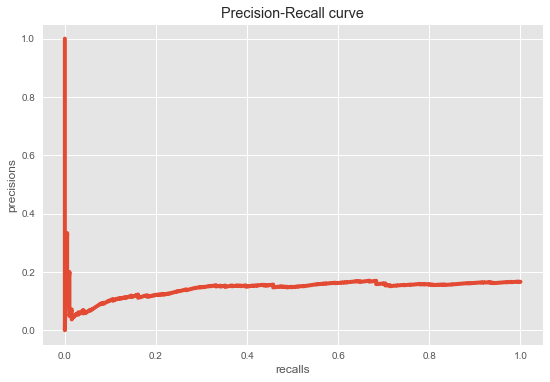

In [138]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [139]:
optuna_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_pre_score

0.1450902192926645

In [140]:
optuna_weighted_f1 = f1_score(y_test, y_pred)
optuna_weighted_recall = recall_score(y_test, y_pred)

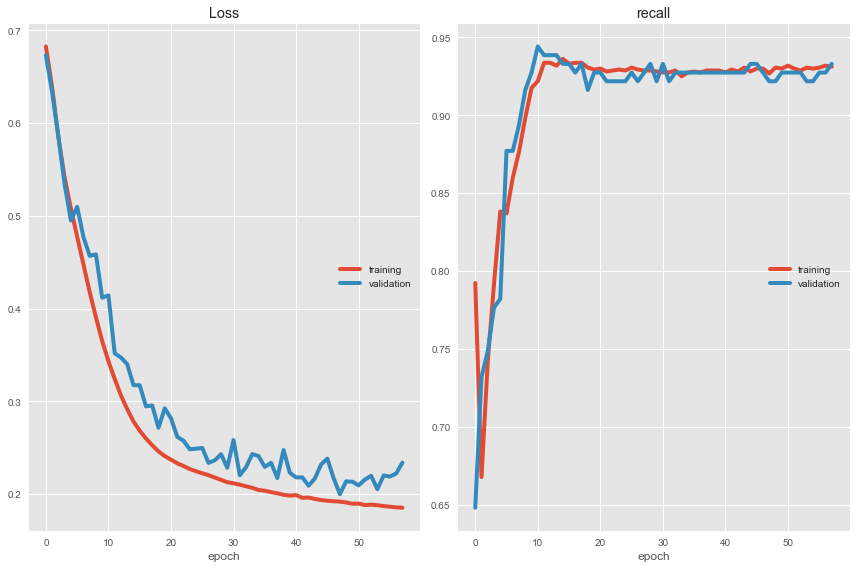

Loss
	training         	 (min:    0.185, max:    0.683, cur:    0.185)
	validation       	 (min:    0.200, max:    0.673, cur:    0.234)
recall
	training         	 (min:    0.668, max:    0.936, cur:    0.931)
	validation       	 (min:    0.648, max:    0.944, cur:    0.933)
76/76 [==============================] - 1s 12ms/step - loss: 0.1852 - recall: 0.9312 - val_loss: 0.2339 - val_recall: 0.9330
Epoch 58: early stopping


In [141]:
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

<AxesSubplot:>

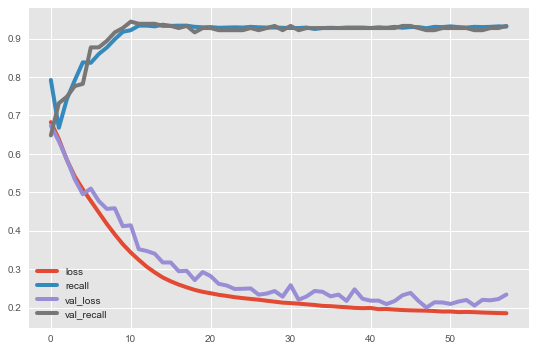

In [142]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [143]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

38/38 [==============================] - 0s 2ms/step
[[957  44]
 [ 11 188]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1001
           1       0.81      0.94      0.87       199

    accuracy                           0.95      1200
   macro avg       0.90      0.95      0.92      1200
weighted avg       0.96      0.95      0.96      1200



In [144]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.1450902192926645

In [145]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

#### Prediction

In [146]:
single_customer = df1.drop('left', axis=1).iloc[[78]]
single_customer

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
78,0.43,0.56,2,157,3,0,0,sales,low


In [147]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [148]:
single_customer1 = single_customer.copy()
single_customer1["departments"] = "sales"
single_customer1["salary"] = "low"

In [149]:
single_customer1 = col_transformer.transform(single_customer1)
single_customer1

array([[  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.43,   0.56,   2.  ,
        157.  ,   3.  ,   0.  ,   0.  ]])

In [150]:
single_customer1 = scaler.transform(single_customer1)
single_customer1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.37362637, 0.3125    ,
        0.        , 0.28504673, 0.125     , 0.        , 0.        ]])

In [151]:
model.predict(single_customer1)

1/1 [==============================] - 0s 25ms/step


array([[0.9253416]], dtype=float32)

In [152]:
(model.predict(single_customer1) > 0.5).astype("int32")

1/1 [==============================] - 0s 15ms/step


array([[1]])

### Model Comparasion

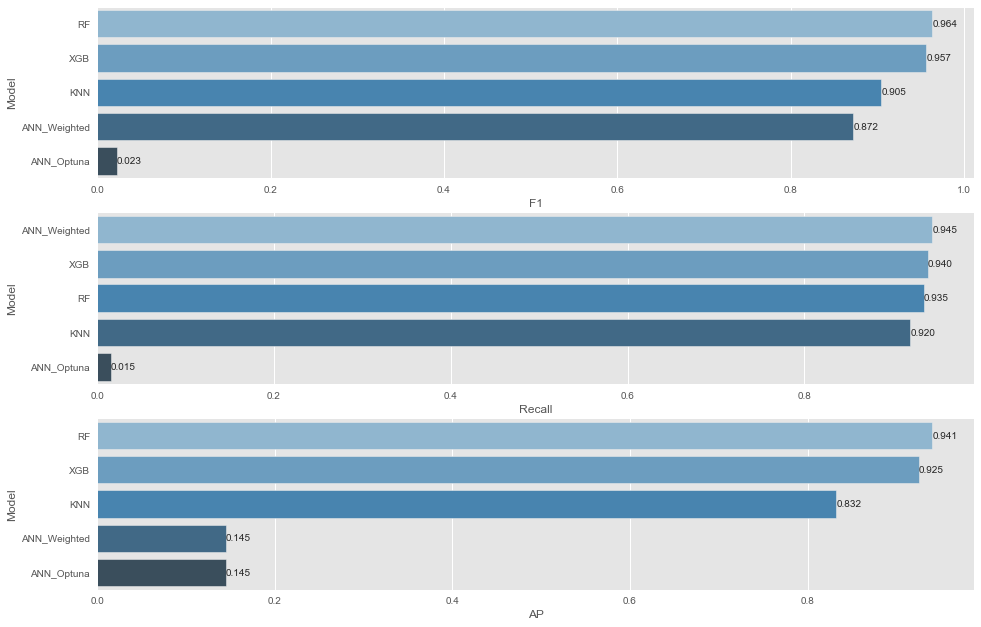

In [153]:
compare = pd.DataFrame({
    "Model": ["XGB","RF","KNN","ANN_Weighted", "ANN_Optuna"],
    "F1": [xgb_f1, rf_f1, knn_f1, weighted_f1, optuna_weighted_f1],
    "Recall": [xgb_recall ,rf_recall, knn_recall, weighted_recall, optuna_weighted_recall],
    "AP": [xgb_pre_score,rf_pre_score,knn_pre_score, weighted_pre_score, optuna_pre_score]
})




def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables


In [155]:
X = df1.drop('left', axis=1)
y = df1['left'].values
pt = PowerTransformer(method='yeo-johnson')
X['time_spend_company'] = pt.fit_transform(X[['time_spend_company']])
pickle.dump(pt, open('power_transformer', 'wb'))
cat_ordinal = ['departments', 'salary']
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), 
                                       remainder=MinMaxScaler(), n_jobs = -1)
X_trans = column_trans.fit_transform(X)
pickle.dump(column_trans, open('transformer', 'wb'))
final_model = XGBClassifier(n_estimators = 100, max_depth = 8, 
                      learning_rate = 0.1, subsample = 0.8, 
                      colsample_bytree =1,
                      n_jobs = -1, random_state=101)
final_model.fit(X_trans, y)
pickle.dump(final_model, open('final_model', 'wb'))

y_pred = final_model.predict(X_trans)
print(classification_report(y, y_pred))

[14:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10000
           1       0.99      0.95      0.97      1991

    accuracy                           0.99     11991
   macro avg       0.99      0.97      0.98     11991
weighted avg       0.99      0.99      0.99     11991



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___